In [1]:
from modules.data import data_loader, data_splitter
from modules.models import arima, lag_llama
from modules.evaluation.evaluate import evaluate

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from itertools import islice

In [3]:
prediction_length = 10

In [4]:
data = data_loader.get_simle_data()
train, test = data_splitter.split_data(data, prediction_length)

[*********************100%%**********************]  1 of 1 completed


In [5]:
arima_model = arima.get_autoarima(train)

In [6]:
autoarima_predictions = arima.autoarima_predictions(arima_model, prediction_length)

In [7]:
lag_llama_predictions, tss = lag_llama.get_lam_llama_forecast(train, prediction_length)

In [8]:
lag_llama_predictions = list(lag_llama_predictions[0].samples.mean(axis = 0))

In [9]:
data["arima_forecast"] = [None] * len(train) + autoarima_predictions
data["lag_llama_forecast"] = [None] * len(train) + lag_llama_predictions

<AxesSubplot: >

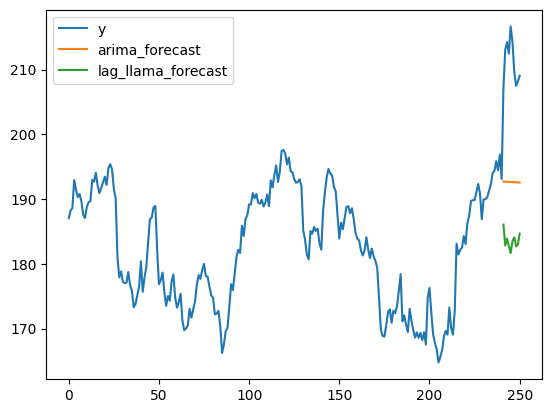

In [10]:
data.drop("ds", axis = 1).plot()

In [11]:
evaluate(list(test["y"]), autoarima_predictions = autoarima_predictions, lag_llama_predictions = lag_llama_predictions)

Evaluation for autoarima_predictions:
Mean Squared Error (MSE): 355.248925427254
Mean Absolute Error (MAE): 18.583026077726952
R-squared (R^2): -34.43958717986132
Root Mean Squared Error (RMSE): 18.848048318784997
------------------------------
Evaluation for lag_llama_predictions:
Mean Squared Error (MSE): 783.1383444861304
Mean Absolute Error (MAE): 27.707282570891728
R-squared (R^2): -77.12578067598356
Root Mean Squared Error (RMSE): 27.98460906437913
------------------------------
